<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/Tensorflow_2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Import, load and training

In [46]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-01-07 05:32:21--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-01-07 05:32:21 (28.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [49]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # make it a 2D array of size NxD where D=1
y = data[:,1]

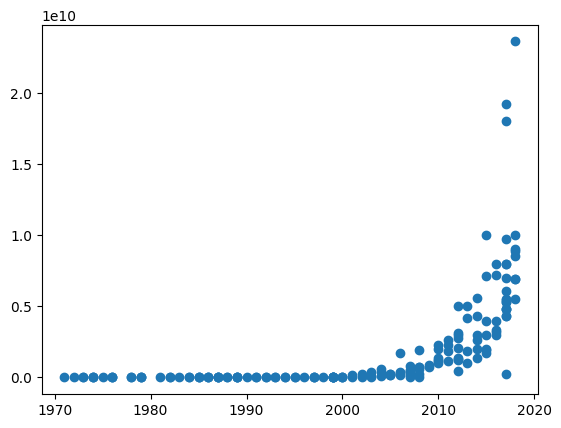

In [50]:
# Plot the data - it is exponential!
plt.scatter(X,y)
plt.show()

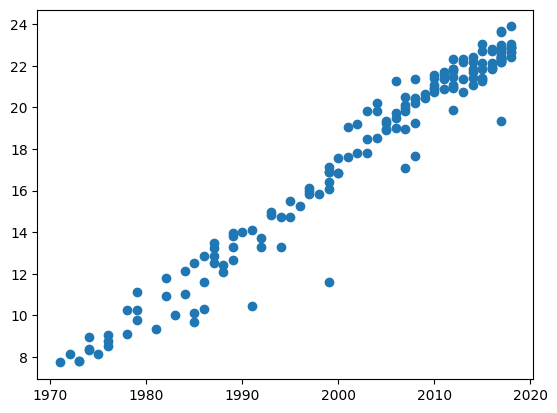

In [51]:
# since we want a linear model, lets take the log
y = np.log(y)
plt.scatter(X,y)
plt.show()

In [52]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [53]:
# now create our tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse)

# learning rate scheduler
def schedule(epoch, lr):
  if epoch>50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 315.9268 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 281.9621 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 283.6453 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 290.2160 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 212.9204 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 271.1803 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 165.2975 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 154.5199 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 153.3349 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 93.6818 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss

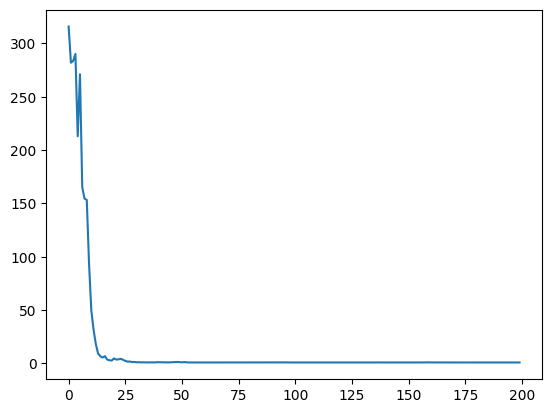

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.show()

In [55]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3496431]], dtype=float32), array([17.77277], dtype=float32)]


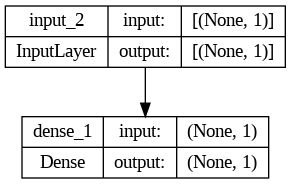

In [56]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [57]:
# maths behind the curtain
maths = "https://deeplearningcourses.com/notebooks/i1o_axG-2vbOI2cB_zUBkg/7djOmJvzNI6Q9P9DGWuBEg"

## Part 2: Making prediction

6/6 [==============================] - 0s 2ms/step


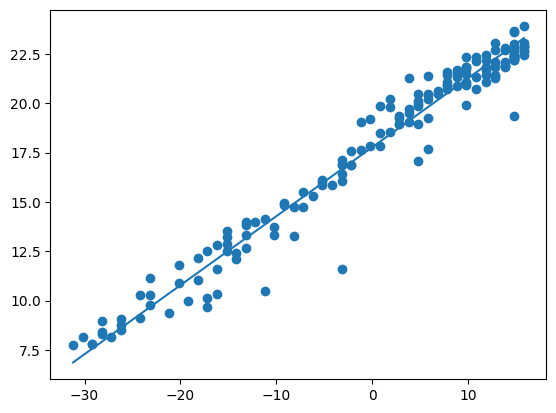

In [58]:
y_hat = model.predict(X).flatten()
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show()

In [59]:
# manual calculation

# get the weights
w, b = model.layers[0].get_weights()

# reshape X because we flattened it earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
y_hat2 = (X.dot(w) + b).flatten()

# dont use '==' for flotting points
np.allclose(y_hat, y_hat2)

True